In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Now, let's generate some noisy data.

In [2]:
# set a random number seed

np.random.seed(119)

# set number of data points

npoints = 50

# set our x values

x = np.linspace(0, 10., npoints)

# set slope, intercept, and scatter RMS

m = 2.0
b = 1.0
sigma = 2.0

# generate our y data points

y = m*x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

### Let's plot the data first.

Text(0, 0.5, 'y')

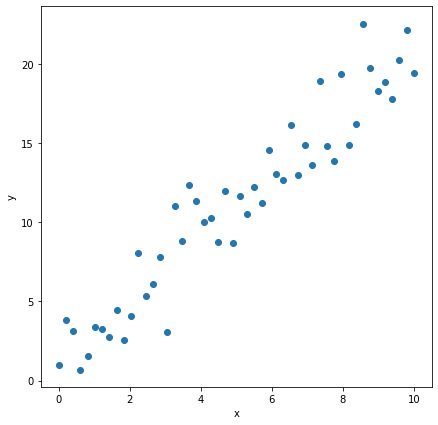

In [3]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

### Method 1, polyfit()

In [4]:
m_fit, b_fit = np.poly1d( np.polyfit(x, y, 1, w=1./y_err))

print(m_fit, b_fit)

y_fit = m_fit * x + b_fit

1.9634043470399505 1.283010681296193


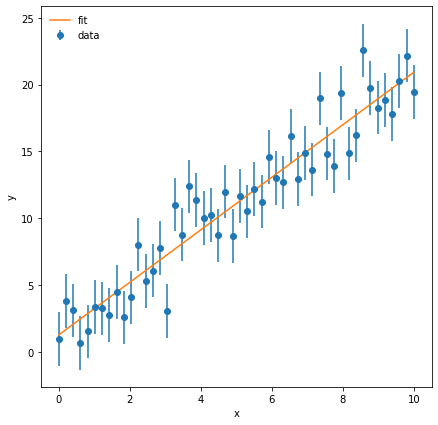

In [5]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o',label='data')
plt.plot(x, y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=False)

### Method #2, scipy + optimize

In [6]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# define a function to fit

def f_line(x, m, b):
    return m*x + b

# perform the fit

params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err)

m_fit_2 = params[0]
b_fit_2 = params[1]
print(m_fit_2, b_fit_2)

1.9634043457508432 1.2830106890542259


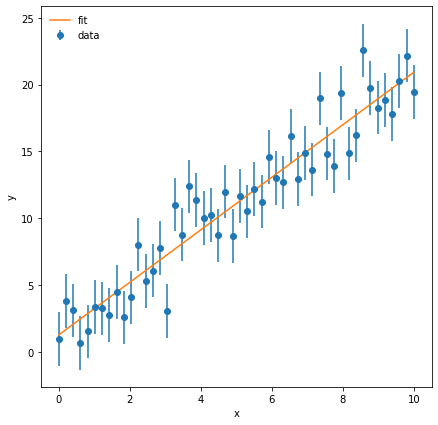

In [7]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='data')
plt.plot(x, y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=False)

In [8]:
### We can perform more complicated fits

Text(0, 0.5, 'y')

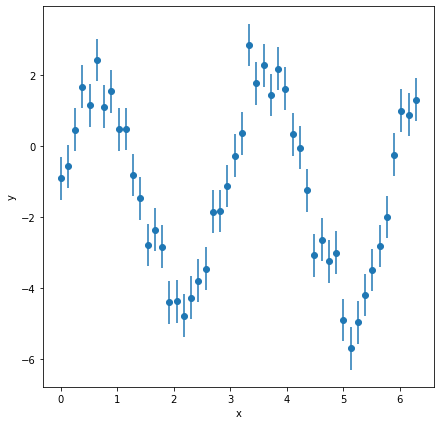

In [11]:
# redefine x and y

npoints = 50
x = np.linspace(0., 2*np.pi, npoints)

# make y a complicated function

a = 3.4
b = 2.1
c = 0.27
d = -1.3
sigma = 0.6

y = a * np.sin(b*x + c) + d + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [15]:
# import optimize from scipy

from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

# define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

# perform the fit

params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err, p0=[1, 2., 0.1, -0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = a_fit * np.sin(b_fit*x + c_fit) + d_fit

3.2867841046562356 2.1352564261877927 0.1203125033440194 -1.2974652339611938


### Plot the fit.

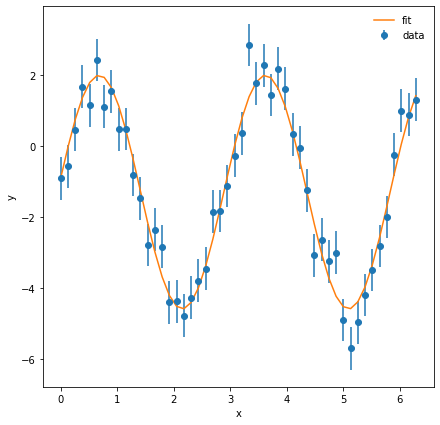

In [17]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='data')
plt.plot(x, y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0, frameon=False)